In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df=pd.read_csv(r"C:\Users\vivek\Downloads\ml project dataset\Melbourne_housing_FULL.csv")
print(df.info())
print("\n")
print(df.isnull().sum())
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [20]:
missing_percentage = df['Postcode'].isnull().mean() * 100
print("Percentage of missing values in 'Postcode' column:", missing_percentage)
correlation_matrix = df.corr()
postcode_correlation = correlation_matrix['Postcode'].sort_values(ascending=False)
print(postcode_correlation)
mean_postcode = df['Postcode'].mean()
df['Postcode'].fillna(mean_postcode, inplace=True)
print("\n")

Percentage of missing values in 'Postcode' column: 0.002868864216656626
Postcode         1.000000
Distance         0.481566
Longtitude       0.362895
Bathroom         0.120080
YearBuilt        0.089805
Bedroom2         0.089292
Rooms            0.085890
Car              0.067886
Price            0.044950
BuildingArea     0.042437
Landsize         0.040664
Propertycount    0.017108
Lattitude       -0.231027
Name: Postcode, dtype: float64




In [21]:
missing_percentage = df['Price'].isnull().mean() * 100
print("Percentage of missing values in 'Price' column:", missing_percentage)
correlation_matrix = df.corr()
price_correlation = correlation_matrix['Price'].sort_values(ascending=False)
print(price_correlation)
mean_price = df['Price'].mean()
df['Price'].fillna(mean_price, inplace=True)
print("\n")

Percentage of missing values in 'Price' column: 21.83205668875692
Price            1.000000
Rooms            0.465238
Bedroom2         0.430275
Bathroom         0.429878
Car              0.201803
Longtitude       0.197874
BuildingArea     0.100754
Postcode         0.044949
Landsize         0.032748
Propertycount   -0.059017
Distance        -0.211384
Lattitude       -0.215607
YearBuilt       -0.333306
Name: Price, dtype: float64




In [22]:
# Check correlation between each column and other features
correlation_matrix = df.corr()
bedroom2_correlation = correlation_matrix['Bedroom2'].sort_values(ascending=False)
bathroom_correlation = correlation_matrix['Bathroom'].sort_values(ascending=False)
propertycount_correlation = correlation_matrix['Propertycount'].sort_values(ascending=False)
buildingarea_correlation = correlation_matrix['BuildingArea'].sort_values(ascending=False)
landsize_correlation = correlation_matrix['Landsize'].sort_values(ascending=False)
yearbuilt_correlation = correlation_matrix['YearBuilt'].sort_values(ascending=False)

print("Correlation with 'Bedroom2' column:\n", bedroom2_correlation)
print("Correlation with 'Bathroom' column:\n", bathroom_correlation)
print("Correlation with 'Propertycount' column:\n", propertycount_correlation)
print("Correlation with 'BuildingArea' column:\n", buildingarea_correlation)
print("Correlation with 'Landsize' column:\n", landsize_correlation)
print("Correlation with 'YearBuilt' column:\n", yearbuilt_correlation)


Correlation with 'Bedroom2' column:
 Bedroom2         1.000000
Rooms            0.946755
Bathroom         0.614892
Car              0.388491
Price            0.368067
Distance         0.269524
BuildingArea     0.154157
Longtitude       0.106164
Postcode         0.089292
Landsize         0.037019
Lattitude        0.003447
YearBuilt       -0.002022
Propertycount   -0.053451
Name: Bedroom2, dtype: float64
Correlation with 'Bathroom' column:
 Bathroom         1.000000
Bedroom2         0.614892
Rooms            0.611826
Price            0.365058
Car              0.307518
YearBuilt        0.167955
BuildingArea     0.147558
Distance         0.126201
Postcode         0.120080
Longtitude       0.106531
Landsize         0.036333
Propertycount   -0.032887
Lattitude       -0.059183
Name: Bathroom, dtype: float64
Correlation with 'Propertycount' column:
 Propertycount    1.000000
YearBuilt        0.022420
Postcode         0.017108
Longtitude       0.016326
Lattitude        0.011112
Car             

In [23]:
# Fill in missing values using mean imputation
mean_bedroom2 = df['Bedroom2'].mean()
df['Bedroom2'].fillna(mean_bedroom2, inplace=True)

mean_bathroom = df['Bathroom'].mean()
df['Bathroom'].fillna(mean_bathroom, inplace=True)

mean_buildingarea = df['BuildingArea'].mean()
df['BuildingArea'].fillna(mean_buildingarea, inplace=True)

mean_landsize = df['Landsize'].mean()
df['Landsize'].fillna(mean_landsize, inplace=True)

mean_yearbuilt = df['YearBuilt'].mean()
df['YearBuilt'].fillna(mean_yearbuilt, inplace=True)

print(df.isnull().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            1
Postcode            0
Bedroom2            0
Bathroom            0
Car              8728
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         3
Lattitude        7976
Longtitude       7976
Regionname          3
Propertycount       3
dtype: int64


In [24]:
df.drop('Suburb', axis=1, inplace=True)
df.drop('Address', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)
df.drop('Distance', axis=1, inplace=True)
df.drop('Car', axis=1, inplace=True)
df.drop('CouncilArea', axis=1, inplace=True)
df.drop('Lattitude', axis=1, inplace=True)
df.drop('Longtitude', axis=1, inplace=True)
df.drop('Regionname', axis=1, inplace=True)
df.drop('Propertycount', axis=1, inplace=True)
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         34857 non-null  int64  
 1   Type          34857 non-null  object 
 2   Price         34857 non-null  float64
 3   Method        34857 non-null  object 
 4   SellerG       34857 non-null  object 
 5   Postcode      34857 non-null  float64
 6   Bedroom2      34857 non-null  float64
 7   Bathroom      34857 non-null  float64
 8   Landsize      34857 non-null  float64
 9   BuildingArea  34857 non-null  float64
 10  YearBuilt     34857 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.9+ MB
None
Rooms           0
Type            0
Price           0
Method          0
SellerG         0
Postcode        0
Bedroom2        0
Bathroom        0
Landsize        0
BuildingArea    0
YearBuilt       0
dtype: int64


In [25]:
print(df.head(10))

   Rooms Type         Price Method  SellerG  Postcode  Bedroom2  Bathroom  \
0      2    h  1.050173e+06     SS   Jellis    3067.0       2.0       1.0   
1      2    h  1.480000e+06      S   Biggin    3067.0       2.0       1.0   
2      2    h  1.035000e+06      S   Biggin    3067.0       2.0       1.0   
3      3    u  1.050173e+06     VB   Rounds    3067.0       3.0       2.0   
4      3    h  1.465000e+06     SP   Biggin    3067.0       3.0       2.0   
5      3    h  8.500000e+05     PI   Biggin    3067.0       3.0       2.0   
6      4    h  1.600000e+06     VB   Nelson    3067.0       3.0       1.0   
7      4    h  1.050173e+06     SN   Nelson    3067.0       3.0       2.0   
8      2    h  1.050173e+06      S   Biggin    3067.0       4.0       1.0   
9      2    h  1.050173e+06      S  Collins    3067.0       3.0       2.0   

   Landsize  BuildingArea    YearBuilt  
0     126.0      160.2564  1965.289885  
1     202.0      160.2564  1965.289885  
2     156.0       79.0000  19

In [26]:
# Define a dictionary to map the string values to specific numbers
method_map = {'SS':1, 'S':2 ,'VB':3, 'SP':4, 'PI':5, 'SN':6, 'W':7, 'PN':8 ,'SA':9}
type_map = {'h': 1, 't': 2, 'u': 3}

# Replace the string values in the 'Method' and 'Type' columns with the mapped numbers
df['Method'] = df['Method'].replace(method_map)
df['Type'] = df['Type'].replace(type_map)


In [27]:

# Select the input variables (features) and target variable
X = df[['Rooms','Bedroom2', 'Bathroom','Landsize','BuildingArea','YearBuilt','Type','Method']]
y = df['Price']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Linear Regression model object
model = LinearRegression()

# Train the model using the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance using R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)


R-squared: 0.25814682420464996


In [28]:
#import matplotlib.pyplot as plt

# Plot the predicted prices against the actual prices
#plt.scatter(y_test, y_pred)
#plt.xlabel('Actual Price')
#plt.ylabel('Predicted Price')
#plt.title('Linear Regression Model Performance')
#plt.show()

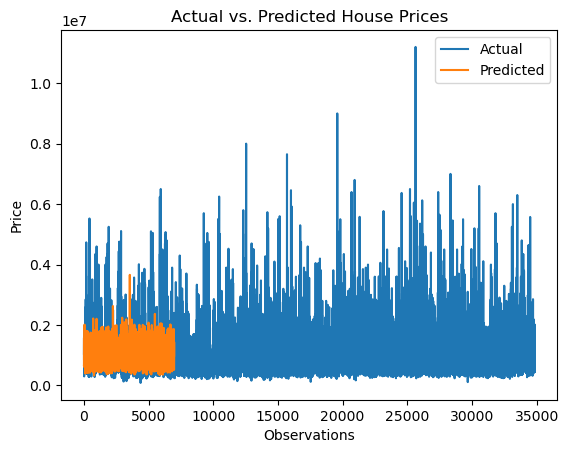

In [29]:
import matplotlib.pyplot as plt
plt.plot(y, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted House Prices')
plt.xlabel('Observations')
plt.ylabel('Price')
plt.show()